# Task 3

# Decision Tree Classifier Model 

In [1]:
# Importing all libraries required in this notebook
import sklearn.datasets as datasets
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Loading the iris dataset
iris = datasets.load_iris()

# Forming the iris dataframe
df=pd.DataFrame(iris.data, columns=iris.feature_names)

In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
y=iris.target

In [5]:
df['target'] = y

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Univariate analysis of continuous variables

In [7]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002A3E806AC48>,
      dtype=object)

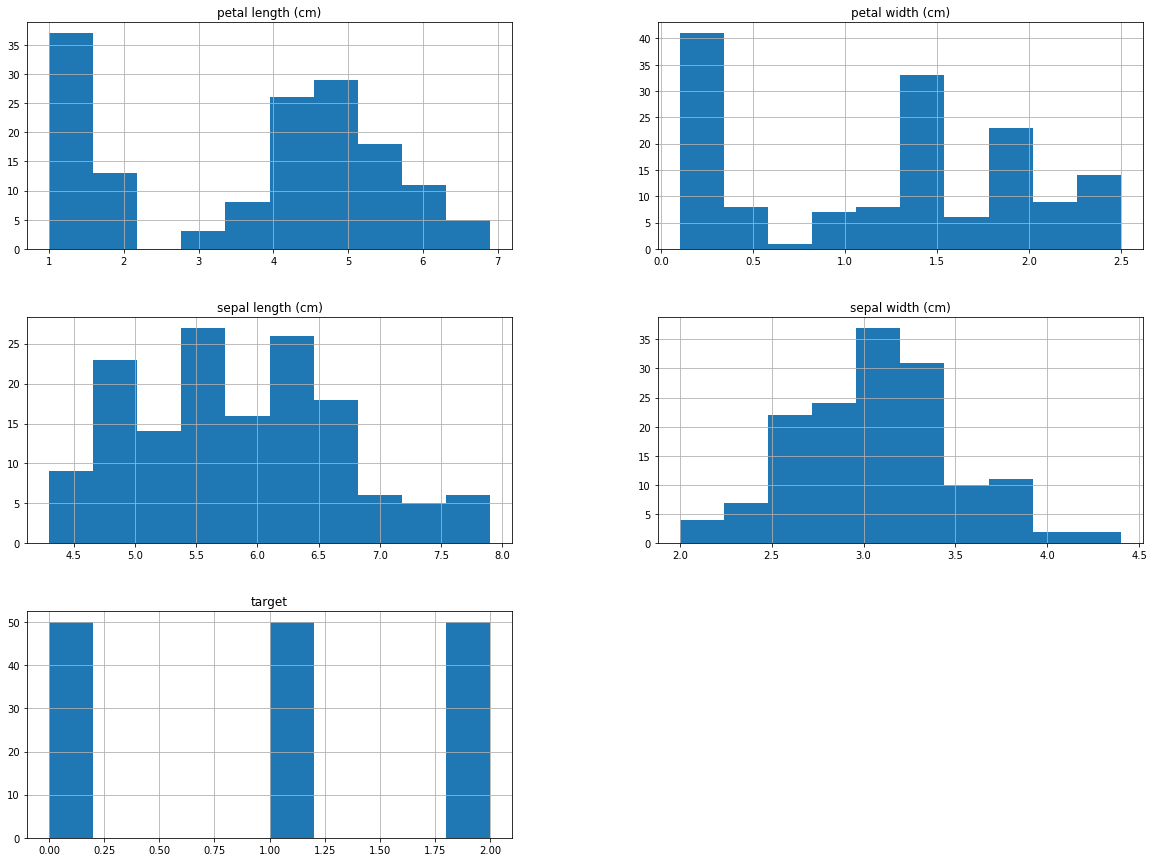

In [8]:
df.hist(figsize = (20,15))

### Continuous - Continuous Bivariate analysis

In [9]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


### Check is there missing value in dataset.

In [10]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

### Decision Tree Classifier Model

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [12]:
x=df.drop('target',axis=1)
y=df['target']

### Split dataset into training and testing sets 

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [14]:
# Fit the classifier with default hyper-parameters
dtree=DecisionTreeClassifier(random_state=1234)
model=dtree.fit(x_train,y_train)

In [15]:
pred=dtree.predict(x_test)

In [16]:
comparison = pd.DataFrame({'Actual' : y_test, 'Predicted': pred})
comparison.head()

,Actual,Predicted
17,0,0
16,0,0
68,1,1
60,1,1
111,2,2


### Accuracy of Model

In [17]:
from sklearn.metrics import accuracy_score
print('Accuracy of Decision tree Classifier ->', accuracy_score(y_test,pred))

Accuracy of Decision tree Classifier -> 0.9666666666666667


In [18]:
#Let's see how is the Classification report and confusion matrix
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.89      0.94         9
           2       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### Let us visualize the Decision Tree to understand it better.

In [19]:
from sklearn import tree

In [20]:
text_representation=tree.export_text(dtree)
print(text_representation)

|--- feature_2 <= 2.45
|   |--- class: 0
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.85
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: 1
|   |   |--- feature_3 >  1.65
|   |   |   |--- feature_1 <= 3.00
|   |   |   |   |--- class: 2
|   |   |   |--- feature_1 >  3.00
|   |   |   |   |--- class: 1
|   |--- feature_2 >  4.85
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_2 <= 5.05
|   |   |   |   |--- feature_0 <= 6.15
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_0 >  6.15
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  5.05
|   |   |   |   |--- class: 2
|   |   |--- feature_3 >  1.75
|   |   |   |--- class: 2



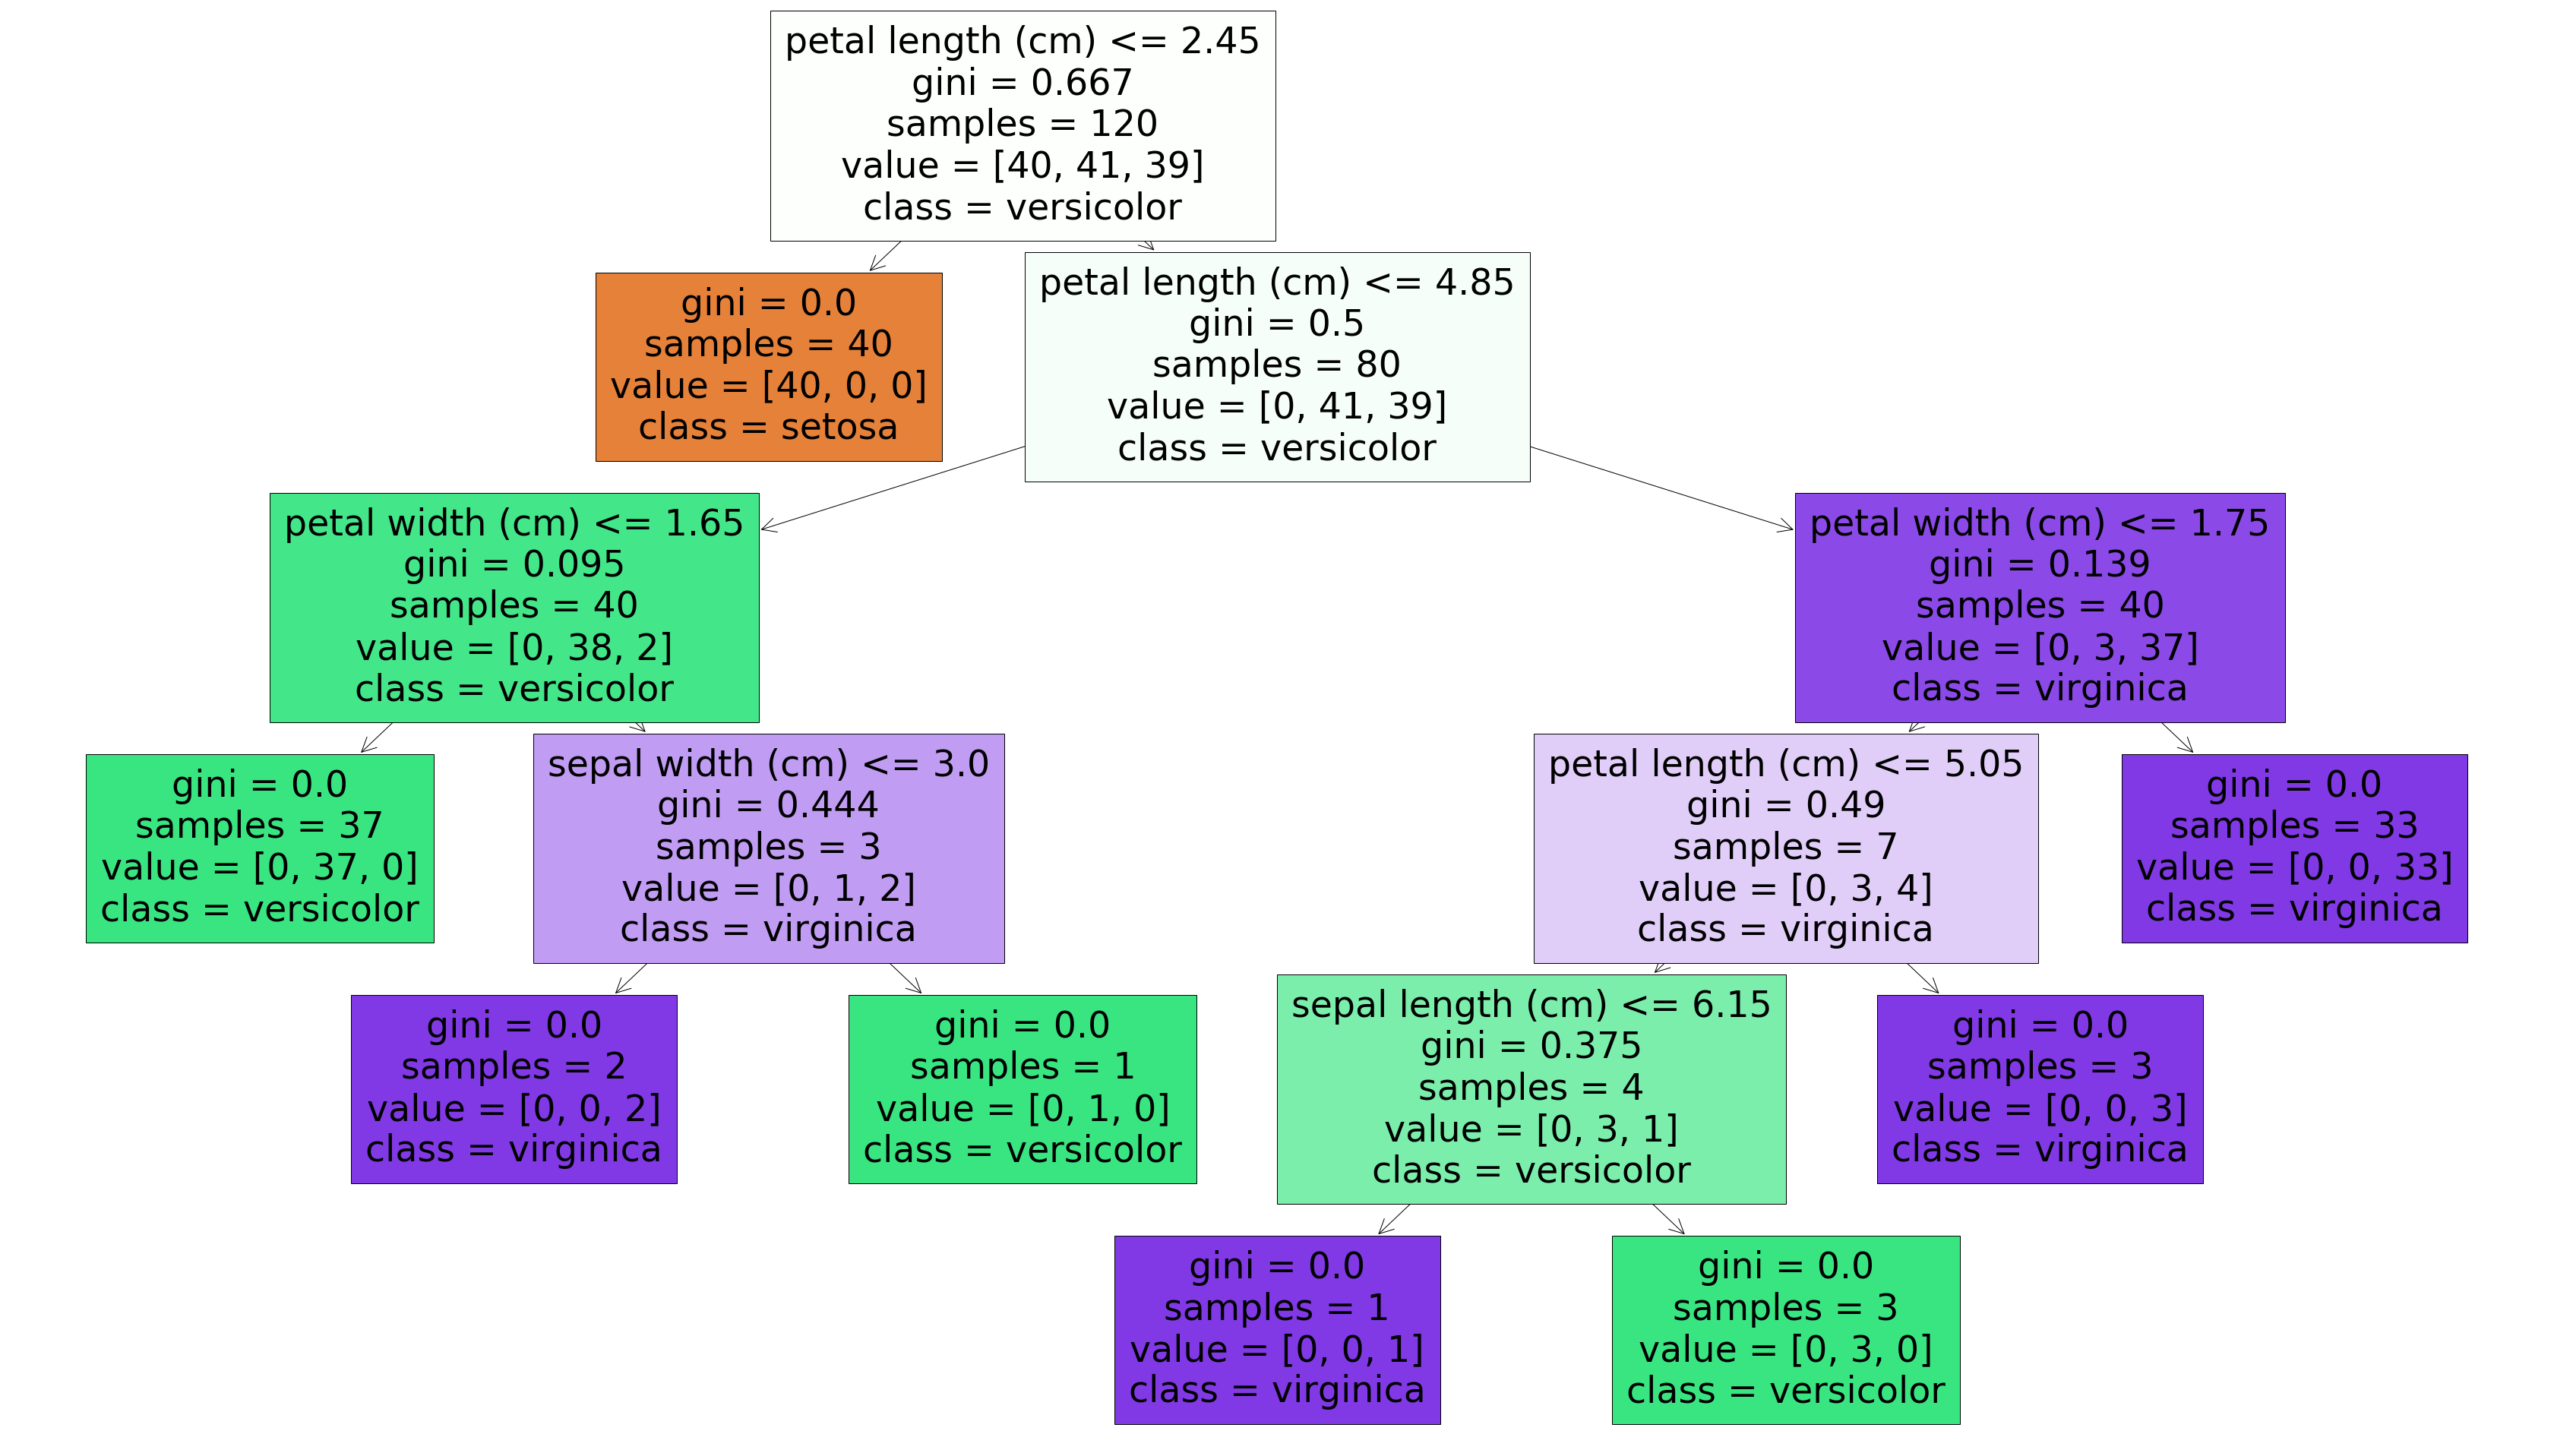

In [21]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,35))
plot_tree(dtree,feature_names=iris.feature_names,class_names=iris.target_names,filled=True);

In [22]:
import graphviz

### Visualize the graph

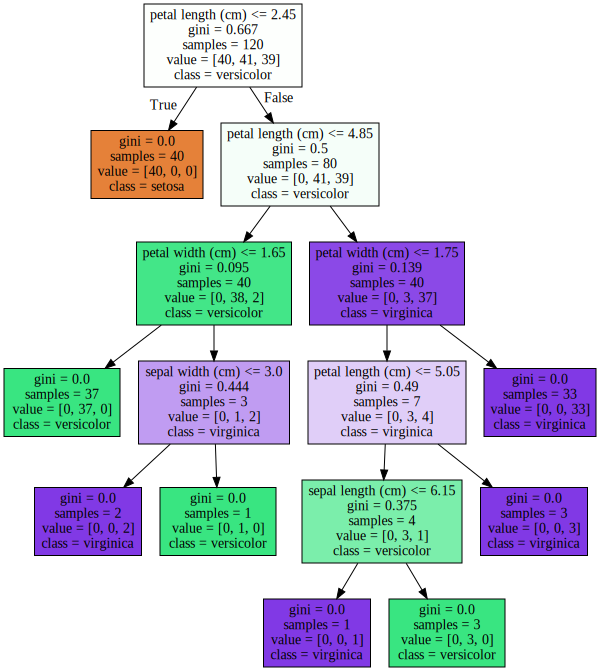

In [23]:
dot_data = tree.export_graphviz(dtree, out_file=None, 
                                feature_names=iris.feature_names,  
                                class_names=iris.target_names,
                                filled=True)
graph = graphviz.Source(dot_data, format="png") 
graph